In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# Reading our feature set and it's corresponding labels
batting_features = pd.read_csv('batting_new_features.csv')
batting_labels = pd.read_csv('batting_labels.csv')
batting_labels = batting_labels['man_of_match']

In [5]:
# Code to supress future warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
batting_features.columns
for column in list(batting_features.columns)[1:11]:
    batting_features[column] = (batting_features[column] - batting_features[column].mean()) / batting_features[column].std()

In [9]:
logistic = []
svm = []

for epoch in range(10): 
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(batting_features, batting_labels, test_size=0.20, random_state=epoch*10)
 from sklearn.preprocessing import Normalizer
 runs_score = np.array(X_train["runs_score"]).reshape(1,-1)
 transformer = Normalizer().fit(runs_score)
 X_train["runs_score"] = transformer.transform(runs_score).reshape(-1,1)
 X_test["runs_score"] = transformer.fit_transform(np.array(X_test["runs_score"]).reshape(1,-1)).reshape(-1,1)
 from sklearn.linear_model import LogisticRegression
 clf = LogisticRegression(random_state=0, max_iter=5000).fit(X_train, y_train)
 y_pred = clf.predict(X_test)
 from sklearn.metrics import accuracy_score
 logistic.append(accuracy_score(y_test, y_pred))
 from sklearn.svm import SVC
 clf_svm = SVC(gamma='auto')
 clf_svm.fit(X_train, y_train)
 y_pred_svm = clf_svm.predict(X_test)
 svm.append(accuracy_score(y_test, y_pred_svm))

In [12]:
for acc in logistic:
    print(acc)

0.9559834938101788
0.9577028885832187
0.9559834938101788
0.951856946354883
0.9583906464924347
0.9594222833562586
0.9570151306740028
0.9625171939477304
0.9563273727647867
0.9570151306740028


In [17]:
for acc in svm:
    print(acc)

0.9491059147180193
0.9473865199449794
0.9528885832187071
0.9477303988995873
0.9494497936726273
0.952200825309491
0.9504814305364512
0.9515130674002751
0.9497936726272352
0.9480742778541953


In [34]:
def plot_acc(epochs, acc, title):
    x = np.arange(1,11,1) * 10
    plt.scatter(x, acc)
    
    plt.title(title)
    plt.xlabel('Seed Values')
    plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.show()

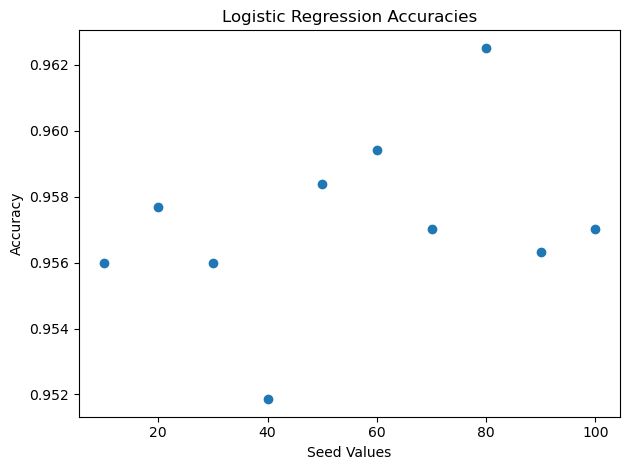

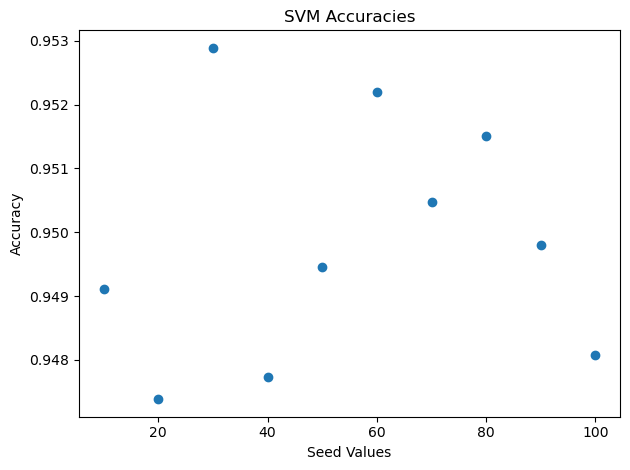

In [35]:
plot_acc(10, logistic, 'Logistic Regression Accuracies')
plot_acc(10, svm, 'SVM Accuracies')